# UM TESTE DE TURING “SOCIOLÓGICO” - Análise dos dados da pesquisa

## PRIMEIRA ETAPA
- Limpeza e organização dos dados brutos, por meio do descarte de respostas qualitativas (não necessárias a etapa de tratamento e análise via Python), bem como ajustes em dados confusos/incompletos/respondidos de maneira errônea (respostas do campo outro em área de formação).


### Carregando as respostas do questionário

In [ ]:
import pandas as pd

df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1')

### Limpando o dataset

In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop columns: 'nome', 'email' and 2 other columns
    df = df.drop(columns=['nome', 'email', 'opiniao_texto', 'hora_inicio'])
    df.rename(columns={'hora_conclusao': 'hora_inicio', 'Id': 'id'}, inplace=True)
    # Strip leading and trailing whitespaces
    df['area_formacao'] = df['area_formacao'].str.strip()

    # Replace all instances of the wrong labels for "Ciências Sociais e Humanas" in column: 'area_formacao'
    erros = ["Artes Visuais", "Ciências Jurídicas - Direito", "Design", "Direito", "Letras", "Linguagem", "Linguagens", "Pedagogia", "Pegagogia", "Teologia", "Ciências da Educação", "DESIGN MODA", "Professora", "Professora Educação Física", "Pedagoga", "Moda", "Educação", "Comunicação social"]
    df['area_formacao'] = df['area_formacao'].replace(erros, "Ciências Sociais e Humanas", regex=False)

    # Replace all instances of the wrong errors to "Ciências Sociais e Humanas" in column: 'area_formacao'
    erros = ["ADM", "ADM marketing", "Marketing Digital", "Ciências Contábeis", "Ciências Econômicas e Administrativas ;Graduanda de Psicologia", "Processos gerenciais"]
    df['area_formacao'] = df['area_formacao'].replace(erros, "Ciências Econômicas e Administrativas", regex=False)

    # Replace all instances of the wrong errors to "Tecnologia" in column: 'area_formacao'
    erros = ["Analise e Desenvolvimento de Sistemas", "Ciências da Computação", "Sistemas"]
    df['area_formacao'] = df['area_formacao'].replace(erros, "Tecnologia", regex=False)

    # Replace all instances of the wrong errors to "Saúde e Ciências Médicas" in column: 'area_formacao'
    erros = ["Beleza", "Biomedicina", "Estética", "Fisioterapeuta", "Psicologia"]
    df['area_formacao'] = df['area_formacao'].replace(erros, "Saúde e Ciências Médicas", regex=False)

    # Replace all instances of the wrong errors to "Ciências Exatas e da Terra" in column: 'area_formacao'
    erros = ["Arquitetura", "ENG ELÉTRICA"]
    df['area_formacao'] = df['area_formacao'].replace(erros, "Ciências Exatas e da Terra", regex=False)

    # Replace all instances of the wrong errors to "Não tenho ainda" in column: 'area_formacao'
    df['area_formacao'] = df['area_formacao'].replace("Não tenho ainda", None, regex=False)

    # Replace all instances of the wrong errors to "Multiáreas" in column: 'area_formacao'
    grupos = ["Ciências Agrárias ;Ciências Biológicas", "Ciências Biológicas ;Ciências Sociais e Humanas", "Ciências Exatas e da Terra ;Ciências Biológicas", "Ciências Exatas e da Terra ;Ciências Sociais e Humanas", "Ciências Exatas e da Terra ;Tecnologia", "Ciências Sociais e Humanas ;Ciências Exatas e da Terra ;Educação", "Ciências Sociais e Humanas ;Saúde e Ciências Médicas", "Ciências Sociais e Humanas ;Tecnologia", "Saúde e Ciências Médicas ;Ciências Sociais e Humanas", "Tecnologia;Ciências Biológicas", "Tecnologia;Ciências Econômicas e Administrativas", "Tecnologia;Ciências Exatas e da Terra", "Tecnologia;Ciências Sociais e Humanas"]
    df['area_formacao'] = df['area_formacao'].replace(grupos, "Multiáreas", regex=False)

    # Replace all instances of the wrong errors to "Ciências Exatas e da Terra" in column: 'area_formacao'
    df['area_formacao'] = df['area_formacao'].fillna("Sem área definida")
    return df

df = clean_data(df.copy())
df.head()

,id,hora_inicio,genero,faixa_etaria,faixa_salarial,nivel_formacao,area_formacao,afinidade_tecnologia,opiniao_ChatGPT,ferramentas,...,futuro_IA_2,pais_humano_2,brasil_humano_2,imagem_IA_2,grafico_humano_2,nota_chuva,nota_roupas,nota_equacao,nota_arte,nota_geopolitica
0,7,2024-10-20 19:21:20,Feminino,21 a 30,"R$ 2.001,00 a R$ 4.000,00",Superior Completo,Ciências Exatas e da Terra,Alta,Muito positiva,"Redes sociais (e.g., Facebook, Instagram) ;Fer...",...,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,5,5,5,5,5
1,8,2024-10-20 19:23:57,Feminino,21 a 30,"R$ 4.001,00 a R$ 6.000,00",Mestrado Completo,Multiáreas,Média,Positiva,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,NaN,NaN,4,5,4,4,3
2,9,2024-10-20 19:25:17,Masculino,61 ou mais,"R$ 4.001,00 a R$ 6.000,00",Pós-Graduação Completo,Tecnologia,Alta,Muito positiva,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,NaN,NaN,1,3,5,5,3
3,10,2024-10-20 19:26:24,Feminino,21 a 30,"R$ 4.001,00 a R$ 6.000,00",Superior Incompleto,Ciências Econômicas e Administrativas,Alta,Neutra,"Redes sociais (e.g., Facebook, Instagram) ;Pla...",...,NaN,NaN,NaN,NaN,NaN,4,4,5,4,4
4,11,2024-10-20 19:29:59,Feminino,21 a 30,"até R$ 2.000,00",Superior Incompleto,Ciências Econômicas e Administrativas,Média,Positiva,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,NaN,NaN,5,4,5,4,3


In [ ]:
# prompt: add an id column to my df
# Add an 'id' column with unique integers
df['id'] = range(1, len(df) + 1)

df.head()

,id,hora_inicio,genero,faixa_etaria,faixa_salarial,nivel_formacao,area_formacao,afinidade_tecnologia,opiniao_ChatGPT,ferramentas,...,futuro_IA_2,pais_humano_2,brasil_humano_2,imagem_IA_2,grafico_humano_2,nota_chuva,nota_roupas,nota_equacao,nota_arte,nota_geopolitica
0,1,2024-10-20 19:21:20,Feminino,21 a 30,"R$ 2.001,00 a R$ 4.000,00",Superior Completo,Ciências Exatas e da Terra,Alta,Muito positiva,"Redes sociais (e.g., Facebook, Instagram) ;Fer...",...,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,5,5,5,5,5
1,2,2024-10-20 19:23:57,Feminino,21 a 30,"R$ 4.001,00 a R$ 6.000,00",Mestrado Completo,Multiáreas,Média,Positiva,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,NaN,NaN,4,5,4,4,3
2,3,2024-10-20 19:25:17,Masculino,61 ou mais,"R$ 4.001,00 a R$ 6.000,00",Pós-Graduação Completo,Tecnologia,Alta,Muito positiva,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,NaN,NaN,1,3,5,5,3
3,4,2024-10-20 19:26:24,Feminino,21 a 30,"R$ 4.001,00 a R$ 6.000,00",Superior Incompleto,Ciências Econômicas e Administrativas,Alta,Neutra,"Redes sociais (e.g., Facebook, Instagram) ;Pla...",...,NaN,NaN,NaN,NaN,NaN,4,4,5,4,4
4,5,2024-10-20 19:29:59,Feminino,21 a 30,"até R$ 2.000,00",Superior Incompleto,Ciências Econômicas e Administrativas,Média,Positiva,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,NaN,NaN,5,4,5,4,3


### Conferindo as áreas de formação

In [ ]:
df['area_formacao'].value_counts()

,count
area_formacao,
Sem área definida,114
Ciências Sociais e Humanas,93
Saúde e Ciências Médicas,49
Ciências Exatas e da Terra,37
Tecnologia,32
Ciências Econômicas e Administrativas,22
Multiáreas,16
Ciências Biológicas,10
Ciências Agrárias,1


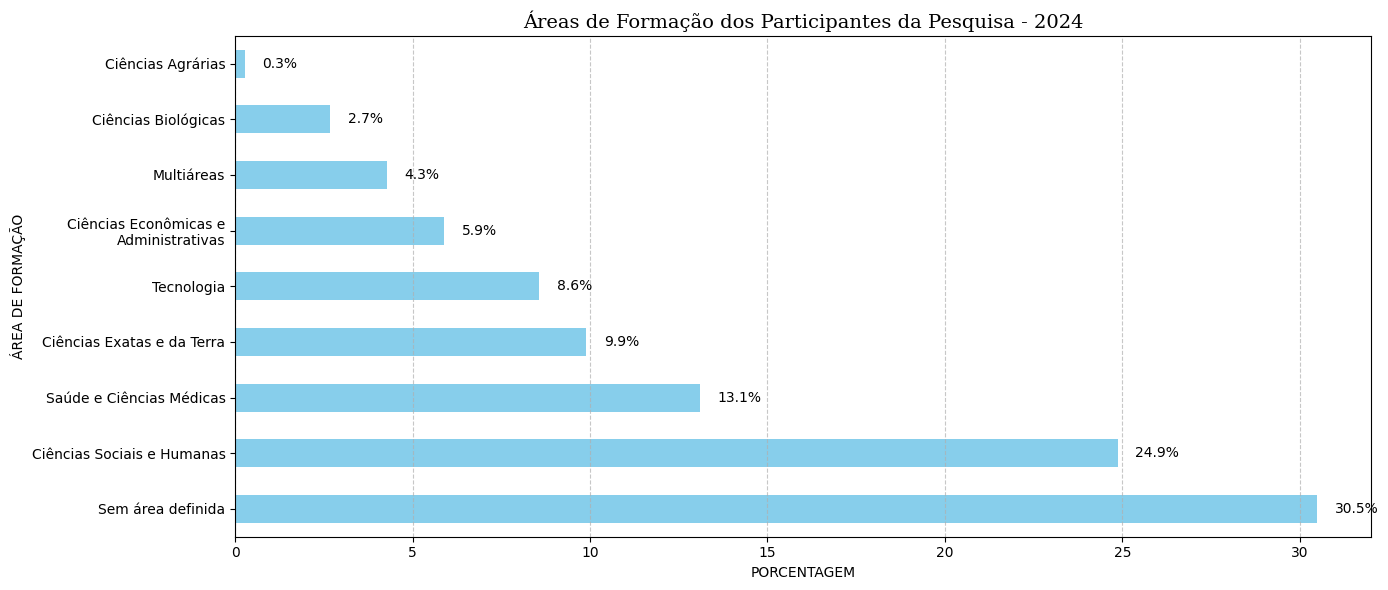

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# ... (código anterior permanece inalterado)

# Conta as ocorrências de cada área de formação
contagem_areas = df['area_formacao'].value_counts()

# Calcula as porcentagens
porcentagens = (contagem_areas / contagem_areas.sum()) * 100

# Cria o gráfico de barras horizontais com porcentagens
plt.figure(figsize=(14, 6))
ax = porcentagens.plot(kind='barh', color='skyblue')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adiciona linhas de grade no eixo x

# Ajusta o texto de "Ciências Econômicas e Administrativas"
labels = [item.get_text() if item.get_text() != 'Ciências Econômicas e Administrativas' else 'Ciências Econômicas e\nAdministrativas' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)

# Adiciona os valores percentuais ao final de cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2,
             '{:1.1f}%'.format(width),  # Formata como porcentagem com uma casa decimal
             ha='left', va='center')

# Personaliza o gráfico
plt.title('Áreas de Formação dos Participantes da Pesquisa - 2024',
          fontsize=14, fontweight=400, color='black', fontfamily='serif')
plt.ylabel('ÁREA DE FORMAÇÃO')
plt.xlabel('PORCENTAGEM')
plt.xticks(ha='center')
plt.tight_layout()


# Exibe o gráfico
plt.show()

## SEGUNDA ETAPA

- Processamento das variáveis para valores numéricos, facilitando a geração de comparativos e dados para a análise efetiva das respostas coletadas;
- Processamento dos parâmetros e pontuações, bem como, estruturação da variável principal, que consiste no **Nível de Fluência Tecnológica** dos respondentes.

### Atribuição dos pesos numéricos às variáveis socioeconômicas gerais

In [ ]:
def ordenar_campo(df, ordem_correta, coluna):
  # Crie um mapeamento para converter os nomes dos níveis de formação para a ordem correta
  mapeamento_formacao = {nivel: i for i, nivel in enumerate(ordem_correta)}


  # Aplique o mapeamento na coluna
  df[coluna] = df[coluna].str.strip()
  df[coluna] = df[coluna].map(mapeamento_formacao)
  return df[coluna]

#### Processando o nível de formação para números

In [ ]:
# Define a ordem correta dos níveis de formação
ordem_formacao = ['Básico Incompleto', 'Básico Completo', 'Fundamental Incompleto',
                  'Fundamental Completo', 'Médio Incompleto', 'Médio Completo',
                  'Superior Incompleto', 'Superior Completo', 'Pós-Graduação Incompleto',
                  'Pós-Graduação Completo', 'Mestrado Incompleto', 'Mestrado Completo',
                  'Doutorado Incompleto', 'Doutorado Completo']

# Ordena o campo de nível de formação e coloca no DF original
df['nivel_formacao'] = ordenar_campo(df, ordem_formacao, 'nivel_formacao')

In [ ]:
df['nivel_formacao']

,nivel_formacao
0,7
1,11
2,9
3,6
4,6
...,...
369,9
370,3
371,9
372,6


#### Processando Opinião GPT para Números

In [ ]:
ordem_opiniao_ChatGPT = ['Muito negativa', 'Negativa', 'Neutra',
                  'Positiva', 'Muito positiva', 'Não sei responder']

# Ordena o campo de opinião ChatGPT e coloca no DF original
df['opiniao_ChatGPT'] = ordenar_campo(df, ordem_opiniao_ChatGPT, 'opiniao_ChatGPT')

In [ ]:
df['opiniao_ChatGPT']

,opiniao_ChatGPT
0,4
1,3
2,4
3,2
4,3
...,...
369,2
370,2
371,3
372,4


#### Processando Área de Formação para Números

In [ ]:
ordem_area_formacao = ['Sem área definida', 'Ciências Sociais e Humanas', 'Saúde e Ciências Médicas', 'Ciências Exatas e da Terra', 'Tecnologia', 'Ciências Econômicas e Administrativas', 'Multiáreas', 'Ciências Biológicas', 'Ciências Agrárias']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['area_formacao'] = ordenar_campo(df, ordem_area_formacao, 'area_formacao')

In [ ]:
df['area_formacao']

,area_formacao
0,3
1,6
2,4
3,5
4,5
...,...
369,1
370,0
371,1
372,1


#### Processando Frequência de Buscas para Números

In [ ]:
ordem_freq_site_busca = ['Nunca', 'Raramente', 'Mensalmente', 'Semanalmente', 'Diariamente']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['freq_site_busca'] = ordenar_campo(df, ordem_freq_site_busca, 'freq_site_busca')

In [ ]:
df['freq_site_busca']

,freq_site_busca
0,4
1,4
2,4
3,4
4,4
...,...
369,4
370,1
371,4
372,4


#### Processando Treinamento para Números

In [ ]:
ordem_treinamento = ['Não, e não tenho planos de participar', 'Não, mas planejo participar em breve', 'Sim, online', 'Sim, presencial']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['treinamento'] = ordenar_campo(df, ordem_treinamento, 'treinamento')

In [ ]:
df['treinamento']

,treinamento
0,1
1,2
2,2
3,2
4,0
...,...
369,1
370,1
371,0
372,2


#### Processando Experiência Script para Números

In [ ]:
ordem_experiencia_script = ['Não, e não sei do que se trata', 'Não, e não tenho interesse', 'Não, mas gostaria de aprender', 'Sim, ocasionalmente', 'Sim, regularmente']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['experiencia_script'] = ordenar_campo(df, ordem_experiencia_script, 'experiencia_script')

In [ ]:
df['experiencia_script']

,experiencia_script
0,0
1,2
2,3
3,2
4,2
...,...
369,2
370,0
371,2
372,3


#### Processando Gênero para Números

In [ ]:
ordem_genero = ['Outra', 'Prefiro não declarar', 'Masculino', 'Feminino']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['genero'] = ordenar_campo(df, ordem_genero, 'genero')

In [ ]:
df['genero']

,genero
0,3.0
1,3.0
2,2.0
3,3.0
4,3.0
...,...
369,3.0
370,2.0
371,3.0
372,2.0


#### Processando Faixa Etária para Números

In [ ]:
ordem_faixa_etaria = ['20 ou menos', '21 a 30', '31 a 40', '41 a 50', '51 a 60', '61 ou mais']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['faixa_etaria'] = ordenar_campo(df, ordem_faixa_etaria, 'faixa_etaria')

In [ ]:
df['faixa_etaria']

,faixa_etaria
0,1
1,1
2,5
3,1
4,1
...,...
369,3
370,4
371,1
372,2


#### Processando Faixa Salarial para Números

In [ ]:
ordem_faixa_salarial = ['Prefiro não informar', 'Sem renda', 'até R$ 2.000,00', 'R$ 2.001,00 a R$ 4.000,00', 'R$ 4.001,00 a R$ 6.000,00', 'R$ 6.001,00 a R$ 8.000,00', 'R$ 8.001,00 ou mais']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['faixa_salarial'] = ordenar_campo(df, ordem_faixa_salarial, 'faixa_salarial')

In [ ]:
df['faixa_salarial']

,faixa_salarial
0,3
1,4
2,4
3,4
4,2
...,...
369,3
370,4
371,6
372,4


#### Processando Afinidade Tecnológica para Números

In [ ]:
ordem_afinidade_tecnologia = ['Nenhuma', 'Pouca', 'Média', 'Alta', 'Muito alta']

# Ordena o campo de opinião ChatGPT e coloca no DF origina
df['afinidade_tecnologia'] = ordenar_campo(df, ordem_afinidade_tecnologia, 'afinidade_tecnologia')

In [ ]:
df['afinidade_tecnologia']

,afinidade_tecnologia
0,3
1,2
2,3
3,3
4,2
...,...
369,2
370,1
371,2
372,2


### Determinação do Nível de Fluência Tecnológica

#### Passo à Passo da Atribuição de Pontuação às Respostas por Pergunta

##### Ferramentas, softwares e aplicativos utilizados regularmente

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column with tools is 'ferramentas'
def calculate_scores(df):
    scores = {}
    for index, row in df.iterrows():
        tools = row['ferramentas']
        if isinstance(tools, str):
            selected_tools = tools.split(';')
            score = len(selected_tools)
            if "Moduladores gerenciais (Moodify, Snapy etc.)" in tools:
                score -= 6
            scores[row['id']] = score  # Assuming 'nome' is the column with respondent names
        else:
          scores[row['id']] = 0 # Handle cases where 'ferramentas' is not a string

    score_df = pd.DataFrame(list(scores.items()), columns=['Entrevistado', 'Pontuação'])
    return score_df

# Example usage (assuming your DataFrame is already loaded as 'df'):
score_table = calculate_scores(df)
score_table

,Entrevistado,Pontuação
0,1,4
1,2,5
2,3,4
3,4,8
4,5,4
...,...,...
369,370,1
370,371,1
371,372,7
372,373,6


In [ ]:
# Group data by score
score_summary = score_table.groupby('Pontuação').size().reset_index(name='Count')

# Display the summary table
score_summary


,Pontuação,Count
0,-5,1
1,1,37
2,2,24
3,3,39
4,4,63
5,5,64
6,6,52
7,7,51
8,8,31
9,9,12


##### Práticas de segurança digital adotadas

In [ ]:
# Assuming your DataFrame is named 'df' and the column with security tools is 'seguranca_digital'
def calculate_security_scores(df):
    scores = {}
    for index, row in df.iterrows():
        tools = row['seguranca_digital']
        if isinstance(tools, str):
            selected_tools = tools.split(';')
            score = len(selected_tools)
            scores[row['id']] = score  # Assuming 'nome' is the column with respondent names
        else:
            scores[row['id']] = 0  # Handle cases where 'seguranca_digital' is not a string

    score_df = pd.DataFrame(list(scores.items()), columns=['Entrevistado', 'Pontuação_Segurança'])
    return score_df

# Example usage (assuming your DataFrame is already loaded as 'df'):
security_score_table = calculate_security_scores(df)
security_score_table

# Group data by security score
security_score_summary = security_score_table.groupby('Pontuação_Segurança').size().reset_index(name='Count')

# Display the summary table
security_score_summary

,Pontuação_Segurança,Count
0,1,68
1,2,74
2,3,97
3,4,73
4,5,62


##### Resolução de problemas técnicos com dispositivos ou softwares

In [ ]:
import pandas as pd

def calculate_problem_scores_weighted(df):
    scores = {}
    for index, row in df.iterrows():
        tools = row['problemas_tecnicos']
        score = 0
        if isinstance(tools, str):
            selected_tools = tools.split(';')
            selected_tools = [tool.strip() for tool in selected_tools]
            for tool in selected_tools:
                if tool == "Evito lidar com problemas tecnológicos":
                    score += 0
                if tool in ("Contato o suporte técnico", "Peço ajuda a amigos ou familiares"):
                    score += 1
                if tool in ("Pesquiso soluções online (tutoriais, fóruns, etc.)", "Tento resolver sozinho(a) por tentativa e erro"):
                    score += 2
            scores[row['id']] = score
        else:
            scores[row['id']] = 0

    score_df = pd.DataFrame(list(scores.items()), columns=['Entrevistado', 'Pontuação_Problemas'])
    return score_df

# Example usage
problem_score_table = calculate_problem_scores_weighted(df)
print("Tabela com a pontuação individual:")
print(problem_score_table)

# Group data by problem score
problem_score_summary = problem_score_table.groupby('Pontuação_Problemas').size().reset_index(name='Total de Participantes')

print("\nTabela com o total de participantes por pontuação:")
print(problem_score_summary)

Tabela com a pontuação individual:
     Entrevistado  Pontuação_Problemas
0               1                    4
1               2                    3
2               3                    4
3               4                    3
4               5                    3
..            ...                  ...
369           370                    1
370           371                    1
371           372                    3
372           373                    4
373           374                    5

[374 rows x 2 columns]

Tabela com o total de participantes por pontuação:
   Pontuação_Problemas  Total de Participantes
0                    0                       5
1                    1                      40
2                    2                      60
3                    3                      90
4                    4                      85
5                    5                      64
6                    6                      30


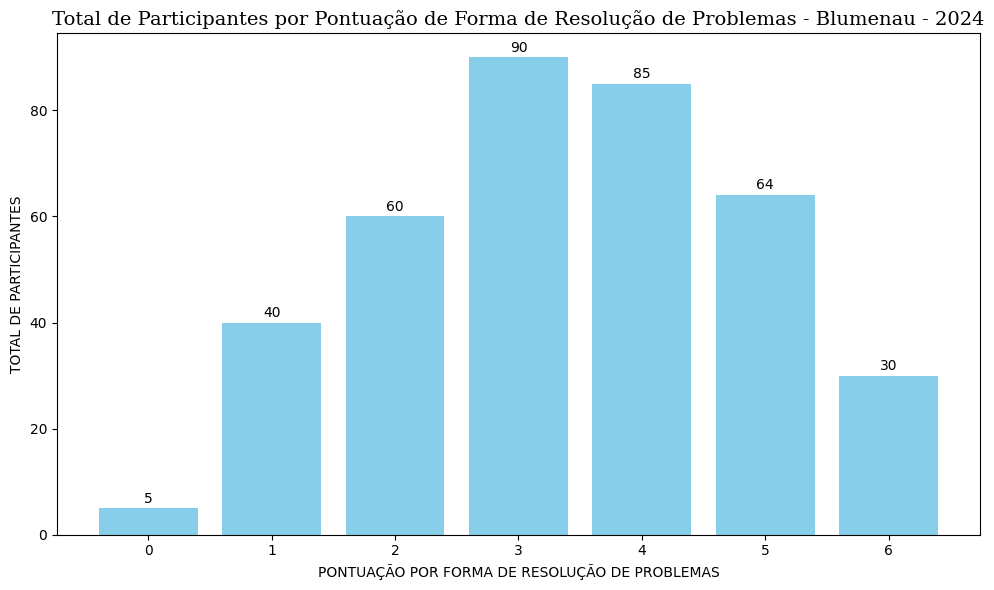

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'problem_score_summary' DataFrame is already created

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(problem_score_summary['Pontuação_Problemas'], problem_score_summary['Total de Participantes'], color='skyblue')

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Customize the chart
plt.xlabel('PONTUAÇÃO POR FORMA DE RESOLUÇÃO DE PROBLEMAS')
plt.ylabel('TOTAL DE PARTICIPANTES')
plt.title('Total de Participantes por Pontuação de Forma de Resolução de Problemas - Blumenau - 2024', fontsize=14, fontweight= 400, color='black', fontfamily='serif')
plt.xticks(problem_score_summary['Pontuação_Problemas'])  # Ensure all score values are displayed on x-axis
plt.tight_layout()
plt.show()

##### Experiência em linguagens de programação

Tabela com a pontuação individual de experiência em programação:
     Entrevistado  Pontuação_Experiência
0               1                      0
1               2                      0
2               3                      4
3               4                      0
4               5                      0
..            ...                    ...
369           370                      0
370           371                      0
371           372                      0
372           373                      0
373           374                      4

[374 rows x 2 columns]

Tabela com o total de participantes por pontuação de experiência em programação:
   Pontuação_Experiência  Total de Participantes
0                      0                     268
1                      1                      31
2                      2                      22
3                      3                      21
4                      4                      15
5                      5                   

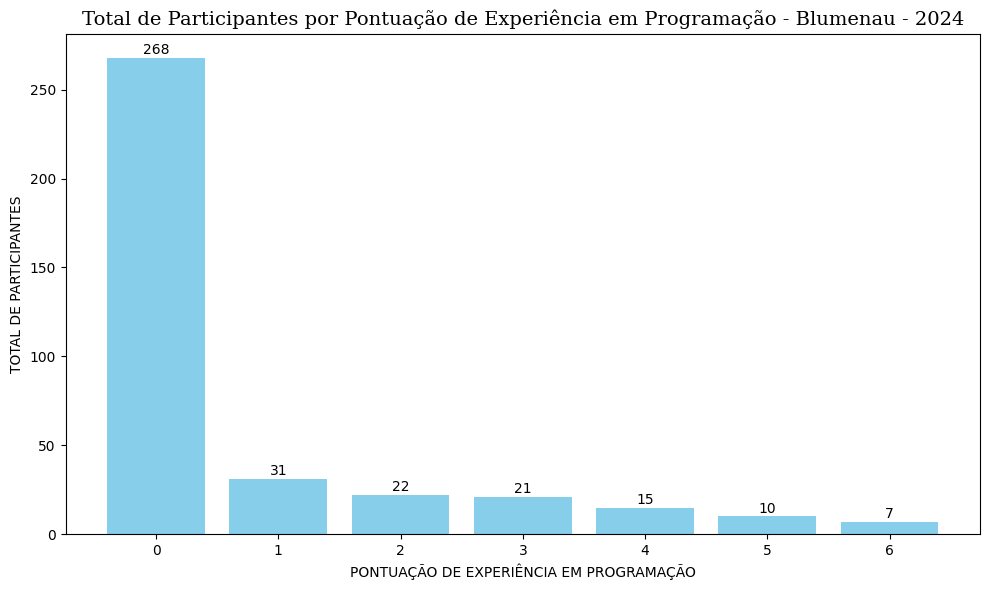

In [ ]:
# prompt: Agora faremos o seguinte:
# - contabilizar o número de respostas selecionada por cada participante na coluna "experiencia_programacao", sendo que a alternativa "Não" vale 0 pontos, e cada um dos demais individualmente valem mais 1 ponto;
# - Gerar uma tabela com a pontuação individual total dos participantes;
# - Gerar uma tabela geral com o número de participantes por pontuação.

def calculate_experience_scores(df):
    scores = {}
    for index, row in df.iterrows():
        experience = row['experiencia_programacao']
        if experience == "Não":
            score = 0
        elif isinstance(experience, str):
            selected_options = experience.split(';')
            score = len(selected_options)
        else:
            score = 0  # Handle cases where 'experiencia_programacao' is not a string or is NaN
        scores[row['id']] = score

    score_df = pd.DataFrame(list(scores.items()), columns=['Entrevistado', 'Pontuação_Experiência'])
    return score_df

# Example usage
experience_score_table = calculate_experience_scores(df)
print("Tabela com a pontuação individual de experiência em programação:")
print(experience_score_table)

# Group data by experience score
experience_score_summary = experience_score_table.groupby('Pontuação_Experiência').size().reset_index(name='Total de Participantes')

print("\nTabela com o total de participantes por pontuação de experiência em programação:")
print(experience_score_summary)

# Create the bar chart for experience
plt.figure(figsize=(10, 6))
bars = plt.bar(experience_score_summary['Pontuação_Experiência'], experience_score_summary['Total de Participantes'], color='skyblue')

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Customize the chart
plt.xlabel('PONTUAÇÃO DE EXPERIÊNCIA EM PROGRAMAÇÃO')
plt.ylabel('TOTAL DE PARTICIPANTES')
plt.title('Total de Participantes por Pontuação de Experiência em Programação - Blumenau - 2024', fontsize=14, fontweight= 400, color='black', fontfamily='serif')
plt.xticks(experience_score_summary['Pontuação_Experiência'])
plt.tight_layout()
plt.show()

In [ ]:
# prompt: Agora a tarefa é mais complicada! Preste atenção:
# - Primeiramente, saiba que para gerar está pontuação individual, teremos que considerar a seguinte escala de resposta/valor:
#         - "Nenhum" = 0 pontos;
#         - "Pouco" = 1 ponto;
#         - "Médio" = 2 pontos;
#         - "Alto" = 3 pontos;
#         - "Profissional" = 4 pontos;
# - Está escala vai somar e resultar em uma pontuação para cada um dos participantes, segundo os dados das colunas: "conhecimento_IA", "conhecimento_IoT", "conhecimento_blockchain", "conhecimento_AR_VR", "conhecimento_nuvem" e "conhecimento_3D";
# - Depois de possuir a pontuação total de cada participante você deve:
#     - Gerar uma tabela com a pontuação individual total dos participantes;
#     - Gerar uma tabela geral com o número de participantes por pontuação.

import pandas as pd

def calculate_total_score(df):
    # Define the scoring mapping
    score_mapping = {
        "Nenhum": 0,
        "Pouco": 1,
        "Médio": 2,
        "Alto": 3,
        "Profissional": 4
    }

    # Columns to consider for the score
    score_columns = ["conhecimento_IA", "conhecimento_IoT", "conhecimento_blockchain",
                     "conhecimento_AR_VR", "conhecimento_nuvem", "conhecimento_3D"]

    # Calculate scores
    total_scores = []
    for index, row in df.iterrows():
        total_score = 0
        for col in score_columns:
            value = row[col]
            if value in score_mapping:
                total_score += score_mapping[value]
        total_scores.append(total_score)

    df['conhecimento_tecnologico'] = total_scores
    return df

# Assuming df is your cleaned DataFrame
df_with_scores = calculate_total_score(df)

# Generate individual score table
individual_score_table = df_with_scores[['id', 'conhecimento_tecnologico']].copy() # Create a copy to avoid SettingWithCopyWarning
print("Tabela com a pontuação individual total dos participantes:")
print(individual_score_table)

# Generate overall score summary table
overall_score_summary = df_with_scores.groupby('conhecimento_tecnologico').size().reset_index(name='Número de Participantes')
print("\nTabela geral com o número de participantes por pontuação:")
overall_score_summary

Tabela com a pontuação individual total dos participantes:
      id  conhecimento_tecnologico
0      1                        10
1      2                         9
2      3                         9
3      4                         1
4      5                        12
..   ...                       ...
369  370                         4
370  371                         4
371  372                         7
372  373                         8
373  374                        13

[374 rows x 2 columns]

Tabela geral com o número de participantes por pontuação:


,conhecimento_tecnologico,Número de Participantes
0,0,8
1,1,15
2,2,18
3,3,33
4,4,36
5,5,40
6,6,35
7,7,22
8,8,33
9,9,30


##### Nível de conhecimento em tecnologias emergentes

Tabela com a pontuação individual total dos participantes:
      id  conhecimento_tecnologico
0      1                        10
1      2                         9
2      3                         9
3      4                         1
4      5                        12
..   ...                       ...
369  370                         4
370  371                         4
371  372                         7
372  373                         8
373  374                        13

[374 rows x 2 columns]

Tabela geral com o número de participantes por pontuação:
    conhecimento_tecnologico  Número de Participantes
0                          0                        8
1                          1                       15
2                          2                       18
3                          3                       33
4                          4                       36
5                          5                       40
6                          6                       35
7     

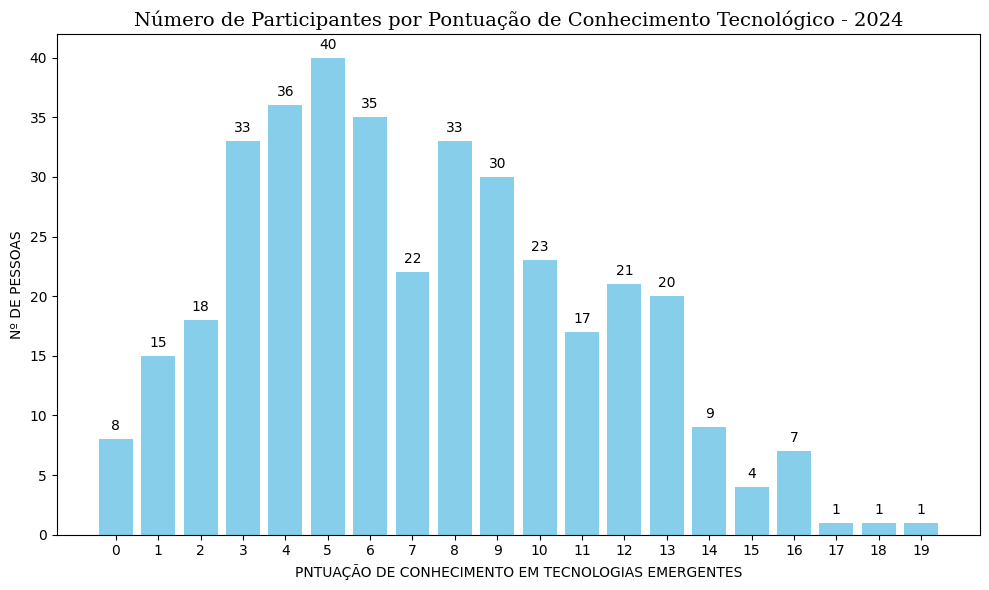

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and preprocessing) ...

def calculate_total_score(df):
    # Define the scoring mapping
    score_mapping = {
        "Nenhum": 0,
        "Pouco": 1,
        "Médio": 2,
        "Alto": 3,
        "Profissional": 4
    }

    # Columns to consider for the score
    score_columns = ["conhecimento_IA", "conhecimento_IoT", "conhecimento_blockchain",
                     "conhecimento_AR_VR", "conhecimento_nuvem", "conhecimento_3D"]

    # Calculate scores
    total_scores = []
    for index, row in df.iterrows():
        total_score = 0
        for col in score_columns:
            value = row[col]
            total_score += score_mapping.get(value, 0) # Use 0 if value is not in the mapping
        total_scores.append(total_score)

    df['conhecimento_tecnologico'] = total_scores
    return df

# Assuming df is your cleaned DataFrame
df_with_scores = calculate_total_score(df)

# Generate individual score table
individual_score_table = df_with_scores[['id', 'conhecimento_tecnologico']].copy()
print("Tabela com a pontuação individual total dos participantes:")
print(individual_score_table)

# Generate overall score summary table
overall_score_summary = df_with_scores.groupby('conhecimento_tecnologico').size().reset_index(name='Número de Participantes')
print("\nTabela geral com o número de participantes por pontuação:")
print(overall_score_summary)


# Create the bar chart for overall knowledge score
plt.figure(figsize=(10, 6))
bars = plt.bar(overall_score_summary['conhecimento_tecnologico'], overall_score_summary['Número de Participantes'], color='skyblue')

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Customize the chart
plt.xlabel('PNTUAÇÃO DE CONHECIMENTO EM TECNOLOGIAS EMERGENTES')
plt.ylabel('Nº DE PESSOAS')
plt.title('Número de Participantes por Pontuação de Conhecimento Tecnológico - 2024', fontsize=14, fontweight=400, color='black', fontfamily='serif')
plt.xticks(overall_score_summary['conhecimento_tecnologico'])
plt.tight_layout()
plt.show()

#### Nível de Fluência Tecnológica - Resultado Final

In [ ]:
def calculate_fluency_index(df):
    # Columns for fluency index calculation
    fluency_columns = ["ferramentas", "seguranca_digital", "problemas_tecnicos", "conhecimento_IA", "conhecimento_IoT", "conhecimento_blockchain", "conhecimento_AR_VR", "conhecimento_nuvem", "conhecimento_3D", "experiencia_programacao"]

    # Initialize fluency scores
    fluency_scores = {}

    for index, row in df.iterrows():
        total_score = 0
        for col in fluency_columns:
            value = row[col]
            if col == "ferramentas":
                if isinstance(value, str):
                    tools = value.split(";")
                    total_score += len(tools)
                    if "Moduladores gerenciais (Moodify, Snapy etc.)" in value:
                        total_score -= 6  # Penalty for specific tool
                else:
                    total_score += 0 # Handle non-string values
            elif col == "problemas_tecnicos":
                if isinstance(value, str):
                  score = 0
                  selected_tools = value.split(';')
                  selected_tools = [tool.strip() for tool in selected_tools]
                  for tool in selected_tools:
                      if tool == "Evito lidar com problemas tecnológicos":
                          score += 0
                      if tool in ("Contato o suporte técnico", "Peço ajuda a amigos ou familiares"):
                          score += 1
                      if tool in ("Pesquiso soluções online (tutoriais, fóruns, etc.)", "Tento resolver sozinho(a) por tentativa e erro"):
                          score += 2
                  total_score += score
                else:
                  total_score += 0
            elif col == "experiencia_programacao":
                if value == "Não":
                    total_score += 0
                elif isinstance(value, str):
                    selected_options = value.split(';')
                    total_score += len(selected_options)
                else:
                    total_score += 0
            elif col in ["conhecimento_IA", "conhecimento_IoT", "conhecimento_blockchain", "conhecimento_AR_VR", "conhecimento_nuvem", "conhecimento_3D"]:
                score_mapping = {"Nenhum": 0, "Pouco": 1, "Médio": 2, "Alto": 3, "Profissional": 4}
                total_score += score_mapping.get(value, 0) # Use 0 if value is not in the mapping
            elif isinstance(value, str): # For "seguranca_digital"
              tools = value.split(";")
              total_score += len(tools)
            else:
              total_score += 0
        fluency_scores[row["id"]] = total_score

    # Create individual score table
    individual_scores_df = pd.DataFrame(list(fluency_scores.items()), columns=["id", "Pontuação Total"])
    print("Tabela com a pontuação individual total dos participantes:")
    print(individual_scores_df)

    # Create overall score summary table
    overall_summary_df = individual_scores_df.groupby("Pontuação Total").size().reset_index(name="Número de Participantes")
    print("\nTabela geral com o número de participantes por pontuação:")
    print(overall_summary_df)

    return individual_scores_df, overall_summary_df


# Example usage
individual_fluency, overall_fluency = calculate_fluency_index(df)

Tabela com a pontuação individual total dos participantes:
      id  Pontuação Total
0      1               21
1      2               21
2      3               26
3      4               16
4      5               21
..   ...              ...
369  370                7
370  371                7
371  372               20
372  373               21
373  374               34

[374 rows x 2 columns]

Tabela geral com o número de participantes por pontuação:
    Pontuação Total  Número de Participantes
0                 3                        1
1                 4                        2
2                 5                        8
3                 6                        3
4                 7                        3
5                 8                        8
6                 9                       10
7                10                       10
8                11                       13
9                12                       13
10               13                       19
11    

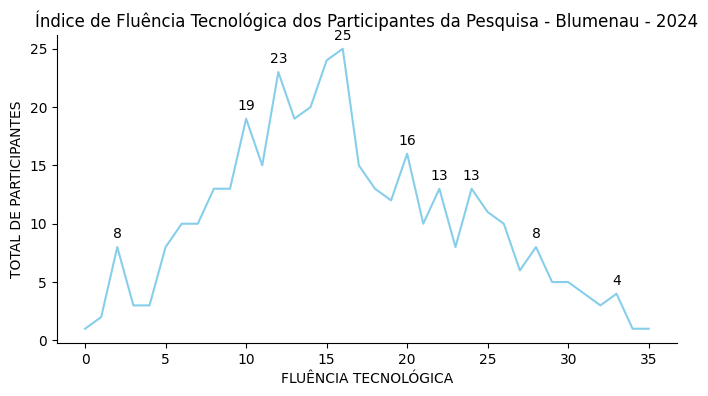

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Create the line chart
overall_fluency['Número de Participantes'].plot(kind='line', figsize=(8, 4), title='Índice de Fluência Tecnológica dos Participantes da Pesquisa - Blumenau - 2024', color='skyblue')

# Customize the chart
plt.xlabel('FLUÊNCIA TECNOLÓGICA')
plt.ylabel('TOTAL DE PARTICIPANTES')
plt.gca().spines[['top', 'right']].set_visible(False)

# Get the data for peak detection
y = overall_fluency['Número de Participantes'].values  # Get y-values
x = overall_fluency.index.values                     # Get x-values (assuming index is your x-axis)

# Find the peaks
peaks, _ = find_peaks(y, prominence=1)  # Adjust prominence as needed

# Annotate the peaks
for peak_x, peak_y in zip(x[peaks], y[peaks]):
    plt.text(peak_x, peak_y + 0.5, str(peak_y), ha='center', va='bottom')  # Adjust offset as needed

# Display the chart
plt.show()

In [ ]:
# prompt: Adicione no dataframe 'df' a coluna 'Pontuação Total' do dataframe individual_fluency

# Merge the dataframes ensuring 'Pontuação Total' is included, using suffixes to prevent name clash
df = pd.merge(df, individual_fluency[['id', 'Pontuação Total']], on='id', how='left')

# Rename the column
df.rename(columns={'Pontuação Total': 'fluencia_tecnologica'}, inplace=True)

In [ ]:
df

,id,hora_inicio,genero,faixa_etaria,faixa_salarial,nivel_formacao,area_formacao,afinidade_tecnologia,opiniao_ChatGPT,ferramentas,...,brasil_humano_2,imagem_IA_2,grafico_humano_2,nota_chuva,nota_roupas,nota_equacao,nota_arte,nota_geopolitica,conhecimento_tecnologico,fluencia_tecnologica
0,1,2024-10-20 19:21:20,3.0,1,3,7,3,3,4,"Redes sociais (e.g., Facebook, Instagram) ;Fer...",...,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,5,5,5,5,5,10,21
1,2,2024-10-20 19:23:57,3.0,1,4,11,6,2,3,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,4,5,4,4,3,9,21
2,3,2024-10-20 19:25:17,2.0,5,4,9,4,3,4,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,1,3,5,5,3,9,26
3,4,2024-10-20 19:26:24,3.0,1,4,6,5,3,2,"Redes sociais (e.g., Facebook, Instagram) ;Pla...",...,NaN,NaN,NaN,4,4,5,4,4,1,16
4,5,2024-10-20 19:29:59,3.0,1,2,6,5,2,3,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,5,4,5,4,3,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,2024-11-20 10:39:07,3.0,3,3,9,1,2,2,"Processadores de texto (e.g., Microsoft Word, ...",...,NaN,NaN,NaN,5,5,3,5,3,4,7
370,371,2024-11-20 11:01:58,2.0,4,4,3,0,1,2,"Redes sociais (e.g., Facebook, Instagram)",...,NaN,NaN,NaN,3,5,4,4,4,4,7
371,372,2024-11-20 12:15:55,3.0,1,6,9,1,2,3,"Redes sociais (e.g., Facebook, Instagram) ;Pla...",...,NaN,NaN,NaN,3,4,4,5,4,7,20
372,373,2024-11-20 12:25:09,2.0,2,4,6,1,2,4,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,NaN,NaN,5,2,4,3,4,8,21


#### Detalhes do Nível de Fluência Tecnológica

In [ ]:
df['fluencia_tecnologica'].describe()

,fluencia_tecnologica
count,374.000000
mean,19.080214
std,7.437964
min,3.000000
25%,14.000000
50%,18.000000
75%,24.000000
max,38.000000


#### Histograma de Fluência Tecnológica

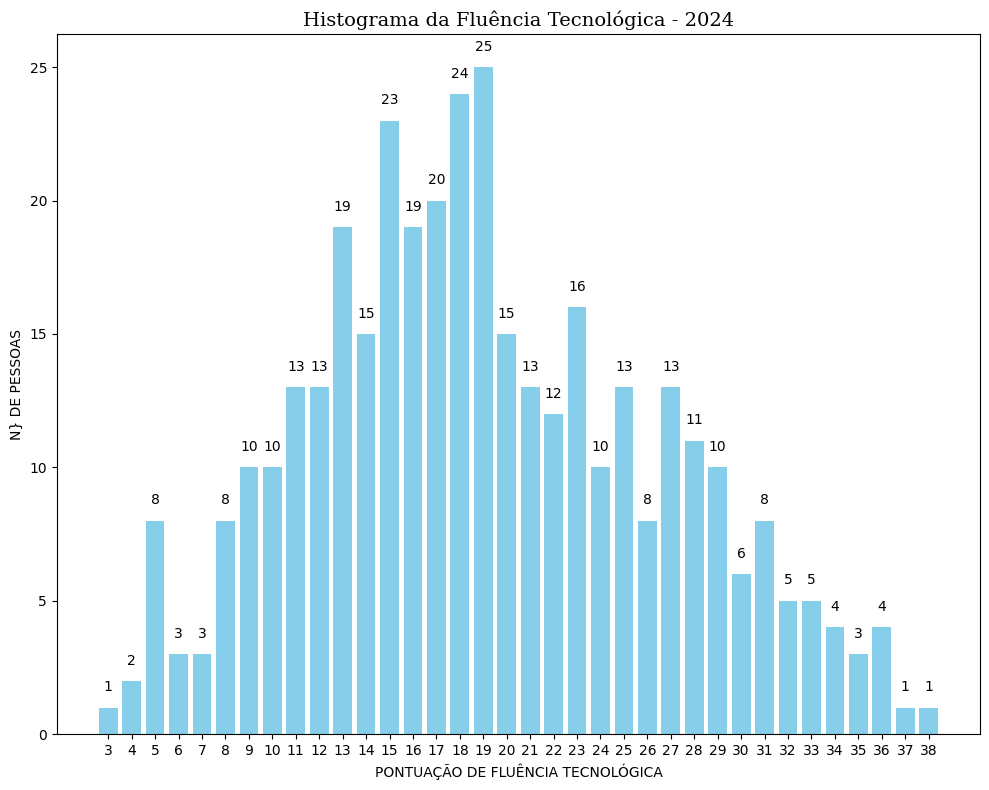

In [ ]:
import matplotlib.pyplot as plt

# Assuming overall_fluency DataFrame is already created as in your provided code

# Create the bar chart for overall knowledge score
plt.figure(figsize=(10, 8))
bars = plt.bar(overall_fluency['Pontuação Total'], overall_fluency['Número de Participantes'], color='skyblue')

# Add the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Customize the chart
plt.xlabel('PONTUAÇÃO DE FLUÊNCIA TECNOLÓGICA')
plt.ylabel('N} DE PESSOAS')
plt.title('Histograma da Fluência Tecnológica - 2024', fontsize=14, fontweight=400, color='black', fontfamily='serif')
plt.xticks(overall_fluency['Pontuação Total'])
plt.tight_layout()
plt.show()

Média: 19.080213903743317
Mediana: 18.0
Moda: 19
Desvio Padrão: 7.437963914454575


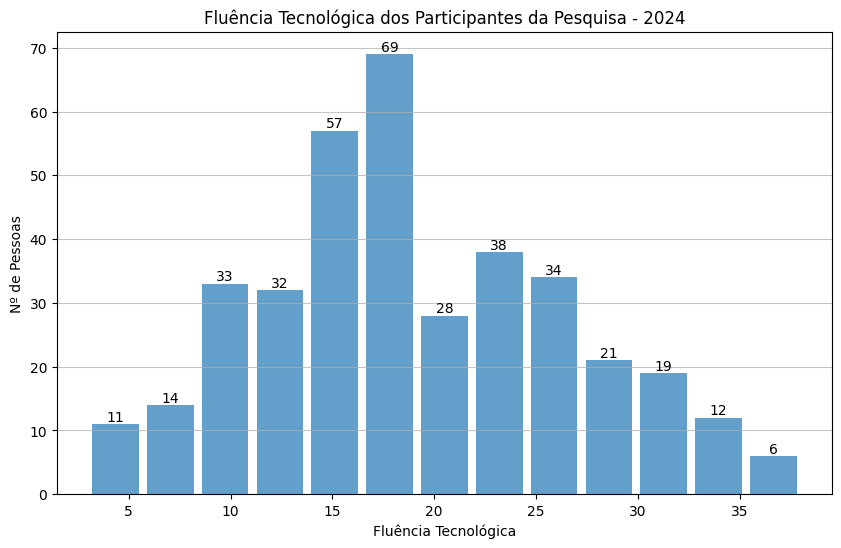

In [ ]:
# Calculate descriptive statistics
mean_fluency = df['fluencia_tecnologica'].mean()
median_fluency = df['fluencia_tecnologica'].median()
mode_fluency = df['fluencia_tecnologica'].mode()[0]  # Get the first mode if multiple exist
std_fluency = df['fluencia_tecnologica'].std()

# Display the descriptive statistics
print("Média:", mean_fluency)
print("Mediana:", median_fluency)
print("Moda:", mode_fluency)
print("Desvio Padrão:", std_fluency)


# Create the histogram with value labels
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['fluencia_tecnologica'], bins='auto', alpha=0.7, rwidth=0.85)

for i in range(len(patches)):
    height = n[i]
    plt.text(bins[i] + (bins[1] - bins[0]) / 2, height, int(height), ha='center', va='bottom')

plt.xlabel('Fluência Tecnológica')
plt.ylabel('Nº de Pessoas')
plt.title('Fluência Tecnológica dos Participantes da Pesquisa - 2024')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Gráfico de Disperção da Fluência Tecnológica

In [ ]:
import plotly.express as px

# Assuming df and the 'fluencia_tecnologica' column are already defined as in the previous code

# Create a sample x-axis if one doesn't exist in your dataframe
x = np.arange(len(df['fluencia_tecnologica']))

# Calculate trendline
z = np.polyfit(x, df['fluencia_tecnologica'], 1)
p = np.poly1d(z)

# Create the interactive scatter plot using Plotly Express
fig = px.scatter(x=x, y=df['fluencia_tecnologica'], trendline="ols",
                 labels={"x": "Índice do Participante", "y": "Nível de Fluência Tecnológica"},
                 title="Gráfico de Dispersão da Fluência Tecnológica com Linha de Tendência - 2024")

# Centraliza o título
fig.update_layout(
    title={
        'text': 'Gráfico de Dispersão da Fluência Tecnológica com Linha de Tendência - 2024',
        'x': 0.5,  # Centraliza o título no eixo x
        'xanchor': 'center',
    }
)
fig.show()

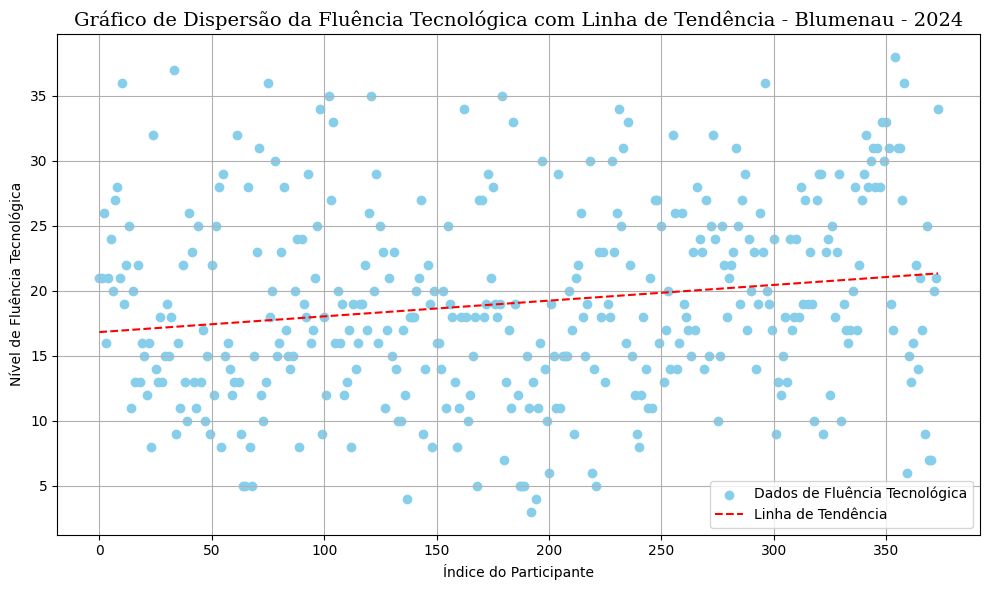

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
fluencia = df['fluencia_tecnologica']
# Create a sample x-axis if one doesn't exist in your dataframe
x = np.arange(len(fluencia))


# Calculate trendline
z = np.polyfit(x, fluencia, 1)
p = np.poly1d(z)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, fluencia, label='Dados de Fluência Tecnológica', color='skyblue')

# Plot the trendline
plt.plot(x, p(x), "r--", label='Linha de Tendência')

# Customize the chart
plt.xlabel('Índice do Participante')
plt.ylabel('Nível de Fluência Tecnológica')
plt.title('Gráfico de Dispersão da Fluência Tecnológica com Linha de Tendência - Blumenau - 2024', fontsize=14, fontweight=400, color='black', fontfamily='serif')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()
plt.show()

### Testes com o índice de fluência tecnológica

In [ ]:
df[['nivel_formacao', 'conhecimento_tecnologico']]

,nivel_formacao,conhecimento_tecnologico
0,7,10
1,11,9
2,9,9
3,6,1
4,6,12
...,...,...
369,9,4
370,3,4
371,9,7
372,6,8


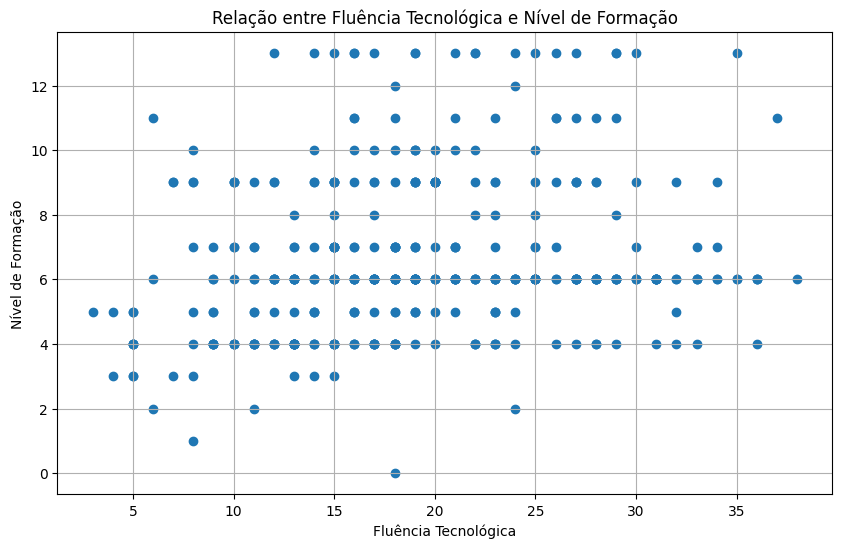

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['fluencia_tecnologica'], df['nivel_formacao'])
plt.xlabel('Fluência Tecnológica')
plt.ylabel('Nível de Formação')
plt.title('Relação entre Fluência Tecnológica e Nível de Formação')
plt.grid(True)
plt.show()

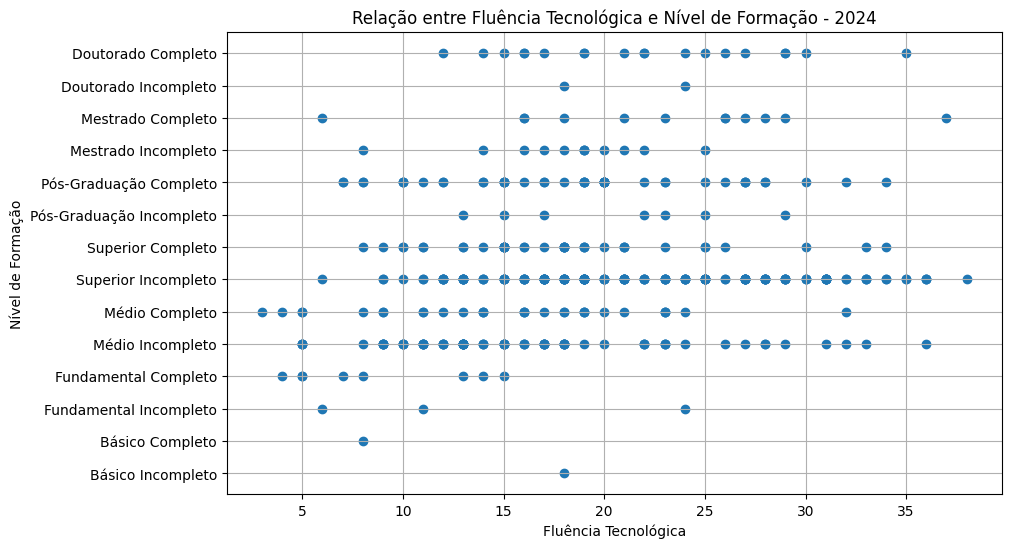

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Agora, crie o gráfico usando a coluna 'nivel_formacao_ordenado'
plt.figure(figsize=(10, 6))
# Ordenando os dados pela nova coluna
df_ordenado = df.sort_values(by='nivel_formacao')
plt.scatter(df_ordenado['fluencia_tecnologica'], df_ordenado['nivel_formacao'])

# Adicionando os nomes dos níveis de formação como ticks no eixo y
plt.yticks(range(len(ordem_formacao)), ordem_formacao)


plt.xlabel('Fluência Tecnológica')
plt.ylabel('Nível de Formação')
plt.title('Relação entre Fluência Tecnológica e Nível de Formação - 2024')
plt.grid(True)
plt.show()

## TERCEIRA ETAPA
- Determinação da pontuação dos respondentes nas questões de identificação de autoria (Humano x IA);
- Produção de correlações, tabelas e gráficos capazes de clarificar o resultado das informações coletadas.

### Gabarito das questões sobre a autoria

In [ ]:
# Respostas corretas para cada cor de "imagem"
correct_answers = {
    "Azul": {
        "café_IA_1": "Respondido por Inteligência Artificial",
        "comodo_humano_1": "Respondido por um Humano",
        "loja_humano_1": "Respondido por um Humano",
        "internet_IA_1": "Respondido por Inteligência Artificial",
        "futuro_humano_1": "Respondido por um Humano",
        "pais_IA_1": "Respondido por Inteligência Artificial",
        "brasil_IA_1": "Respondido por Inteligência Artificial",
        "imagem_humano_1": "Respondido por um Humano",
        "grafico_IA_1": "Respondido por Inteligência Artificial",
    },
    "Branco": {
        "cafe_humano_1": "Respondido por um Humano",
        "comodo_humano_2": "Respondido por um Humano",
        "loja_IA_1": "Respondido por Inteligência Artificial",
        "internet_humano_1": "Respondido por um Humano",
        "futuro_IA_1": "Respondido por Inteligência Artificial",
        "pais_humano_1": "Respondido por um Humano",
        "brasil_humano_1": "Respondido por um Humano",
        "imagem_IA_1": "Respondido por Inteligência Artificial",
        "grafico_IA_2": "Respondido por Inteligência Artificial",
    },
    "Ciano": {
        "cafe_humano_2": "Respondido por um Humano",
        "comodo_IA_1": "Respondido por Inteligência Artificial",
        "loja_humano_2": "Respondido por um Humano",
        "internet_IA_2": "Respondido por Inteligência Artificial",
        "futuro_humano_2": "Respondido por um Humano",
        "pais_IA_2": "Respondido por Inteligência Artificial",
        "brasil_IA_2": "Respondido por Inteligência Artificial",
        "imagem_humano_2": "Respondido por um Humano",
        "grafico_humano_1": "Respondido por um Humano",
    },
    "Verde": {
        "café_IA_2": "Respondido por Inteligência Artificial",
        "comodo_IA_2": "Respondido por Inteligência Artificial",
        "loja_IA_2": "Respondido por Inteligência Artificial",
        "internet_humano_2": "Respondido por um Humano",
        "futuro_IA_2": "Respondido por Inteligência Artificial",
        "pais_humano_2": "Respondido por um Humano",
        "brasil_humano_2": "Respondido por um Humano",
        "imagem_IA_2": "Respondido por Inteligência Artificial",
        "grafico_humano_2": "Respondido por um Humano",
    },
}

### Cálculo do desemprenho dos participantes

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Modificar a função para incluir rótulos verdadeiros e previstos
def calculate_scores_IA(df):
    individual_scores_IA = []
    error_analysis_IA = {"Erros IA": 0, "Erros Humanos": 0}
    true_labels = []
    predicted_labels = []

    for _, row in df.iterrows():
        color = row["imagem"]
        correct = correct_answers.get(color, {})
        score = 0
        errors = {"IA": 0, "Humanos": 0}

        for question, correct_answer in correct.items():
            if question in row:
                true_labels.append(correct_answer)
                predicted_labels.append(row[question])

                if row[question] == correct_answer:
                    score += 1
                else:
                    if "Inteligência Artificial" in correct_answer:
                        errors["IA"] += 1
                    elif "Humano" in correct_answer:
                        errors["Humanos"] += 1

        individual_scores_IA.append({"Participante": row["id"], "Pontuação": score})
        error_analysis_IA["Erros IA"] += errors["IA"]
        error_analysis_IA["Erros Humanos"] += errors["Humanos"]

    return pd.DataFrame(individual_scores_IA), error_analysis_IA, true_labels, predicted_labels

# Calcular pontuações, erros e rótulos
individual_scores_IA, error_analysis_IA, true_labels, predicted_labels = calculate_scores_IA(df)

### Tabela de desempenho geral

In [ ]:
# Tabela geral de pontuação
general_scores_IA = individual_scores_IA.groupby("Pontuação").size().reset_index(name="Total de Participantes")

# Exibir tabelas de pontuação e erros
print("\nPontuação Individual dos Participantes:")
print(individual_scores_IA)


Pontuação Individual dos Participantes:
     Participante  Pontuação
0               1          2
1               2          2
2               3          5
3               4          5
4               5          4
..            ...        ...
369           370          4
370           371          4
371           372          5
372           373          3
373           374          4

[374 rows x 2 columns]


### Tabela de número de participantes por pontuação

In [ ]:
# Exibir tabelas
print("\nOrganização Geral por Pontuação:")
print(general_scores_IA)


Organização Geral por Pontuação:
   Pontuação  Total de Participantes
0          0                       9
1          1                      48
2          2                      70
3          3                      97
4          4                      85
5          5                      38
6          6                      14
7          7                      10
8          8                       2
9          9                       1


### Histograma de participantes por número de acertos

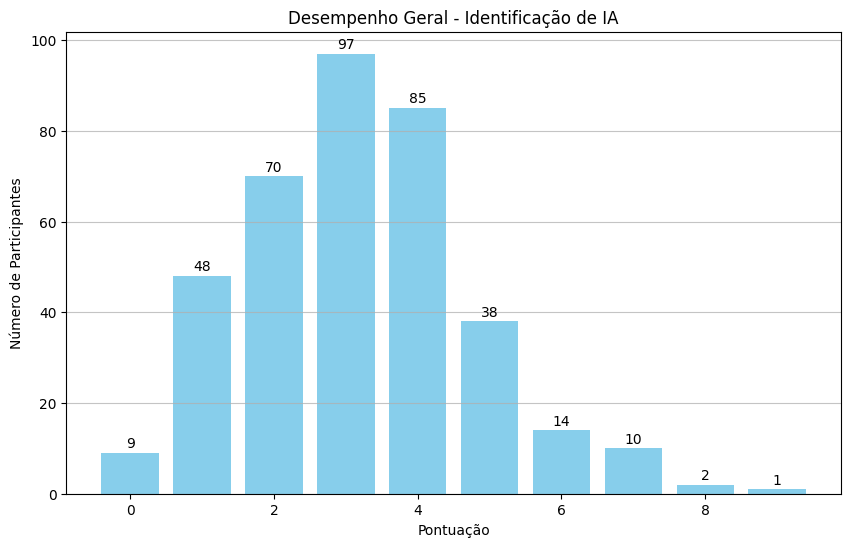

In [ ]:
# Histograma do desempenho geral
plt.figure(figsize=(10, 6))
bars = plt.bar(general_scores_IA["Pontuação"], general_scores_IA["Total de Participantes"], color="skyblue")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom")
plt.xlabel("Pontuação")
plt.ylabel("Número de Participantes")
plt.title("Desempenho Geral - Identificação de IA")
plt.grid(axis="y", alpha=0.75)
plt.show()

### Matriz de Confusão
- Acompanhada das métricas de: acurácia, precisão, sensibilidade,especificidade e F1-score;
- Por fim, análise de erros.

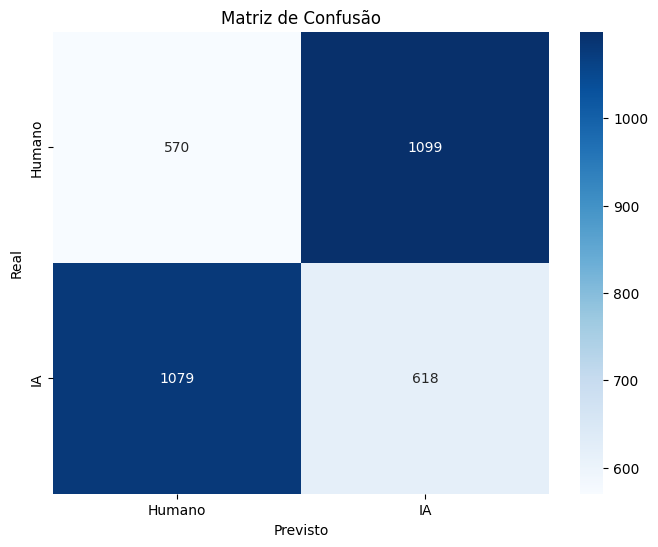

Métricas de Desempenho:
Acurácia: 0.35
Precisão: 0.36
Sensibilidade (Recall): 0.36
Especificidade: 0.34
F1-Score: 0.36

Análise de Erros:
{'Erros IA': 1079, 'Erros Humanos': 1099}


In [ ]:
# Converter rótulos para binário
# "Respondido por Inteligência Artificial" -> 1, "Respondido por um Humano" -> 0
true_binary = [1 if "Inteligência Artificial" in str(ans) else 0 for ans in true_labels]
pred_binary = [1 if "Inteligência Artificial" in str(ans) else 0 for ans in predicted_labels]

# Calcular matriz de confusão
cm = confusion_matrix(true_binary, pred_binary)

# Calcular métricas
accuracy = accuracy_score(true_binary, pred_binary)
precision = precision_score(true_binary, pred_binary)
recall = recall_score(true_binary, pred_binary)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)
f1 = f1_score(true_binary, pred_binary)

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Humano", "IA"], yticklabels=["Humano", "IA"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Exibir métricas
print("Métricas de Desempenho:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Sensibilidade (Recall): {recall:.2f}")
print(f"Especificidade: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nAnálise de Erros:")
print(error_analysis_IA)

### Tabela das respostas indíviduais por participante e questão
- Primeira: com cada questão e resposta, bem como sua acurácia;
- Segunda: com os totais absolutos, e por questão de autoria da IA/Humano, inclusive em %, e ainda, acompanhados da fluência tecnológica de cada indivíduo.

In [ ]:
import pandas as pd

def create_error_analysis_table(df):
    # ... (Your existing code for calculate_scores_IA function)

    # Create a list to store the results for each participant and question
    results = []

    for _, row in df.iterrows():
        participant_id = row["id"]
        color = row["imagem"]
        correct = correct_answers.get(color, {})

        for question, correct_answer in correct.items():
            if question in row:
                user_answer = row[question]
                is_correct = user_answer == correct_answer
                results.append({
                    "Participante": participant_id,
                    "Questão": question,
                    "Resposta Correta": correct_answer,
                    "Resposta do Participante": user_answer,
                    "Correto": is_correct
                })

    # Create the analysis DataFrame from the results list
    analysis_df = pd.DataFrame(results) # This line is added

    # Calculate accuracy per participant
    accuracy_per_participant = analysis_df.groupby("Participante")["Correto"].mean() * 100
    analysis_df = pd.merge(analysis_df, accuracy_per_participant.rename("Acuracia (%)"), left_on="Participante", right_index=True)

    return analysis_df

# Example usage (assuming 'df' is your DataFrame)
error_table = create_error_analysis_table(df)
error_table

,Participante,Questão,Resposta Correta,Resposta do Participante,Correto,Acuracia (%)
0,1,café_IA_2,Respondido por Inteligência Artificial,Respondido por um Humano,False,22.222222
1,1,comodo_IA_2,Respondido por Inteligência Artificial,Respondido por um Humano,False,22.222222
2,1,loja_IA_2,Respondido por Inteligência Artificial,Respondido por um Humano,False,22.222222
3,1,internet_humano_2,Respondido por um Humano,Respondido por Inteligência Artificial,False,22.222222
4,1,futuro_IA_2,Respondido por Inteligência Artificial,Respondido por Inteligência Artificial,True,22.222222
...,...,...,...,...,...,...
3361,374,futuro_humano_1,Respondido por um Humano,Respondido por um Humano,True,44.444444
3362,374,pais_IA_1,Respondido por Inteligência Artificial,Respondido por um Humano,False,44.444444
3363,374,brasil_IA_1,Respondido por Inteligência Artificial,Respondido por um Humano,False,44.444444
3364,374,imagem_humano_1,Respondido por um Humano,Respondido por Inteligência Artificial,False,44.444444


### Total Absoluto de Respostas

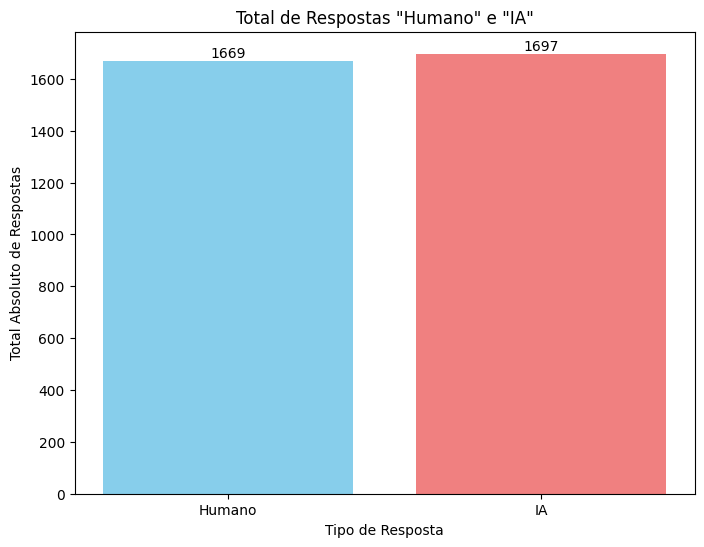

In [ ]:
# prompt: Mostre o total absoluto, ou seja a somatória de todas as respostas "Humano" e "IA" em forma de gráfico

import matplotlib.pyplot as plt

# Assuming 'true_binary' and 'pred_binary' lists are already defined

# Count the occurrences of each label (0 for Human, 1 for IA) in the true labels
human_true_count = true_binary.count(0)
ia_true_count = true_binary.count(1)

# Create a bar chart
labels = ['Humano', 'IA']
counts = [human_true_count, ia_true_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'lightcoral'])
plt.title('Total de Respostas "Humano" e "IA"')
plt.xlabel('Tipo de Resposta')
plt.ylabel('Total Absoluto de Respostas')

# Add labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
# prompt: Usando o DataFrame error_table: Faça uma tabela com o total por participante de acertos e erros (inclusive em %). Coloque também o total por participante de acertos e erros (inclusive em %) para as questões que eram de autoria Humana e da IA. Por fim, acrescente a fluencia_tecnologica de cada um

import pandas as pd

# Calculate total correct and incorrect answers per participant
total_answers = error_table.groupby('Participante')['Correto'].agg(['sum', 'count'])
total_answers = total_answers.rename(columns={'sum': 'Acertos', 'count': 'Total'})
total_answers['Erros'] = total_answers['Total'] - total_answers['Acertos']
total_answers['% Acertos'] = (total_answers['Acertos'] / total_answers['Total']) * 100
total_answers['% Erros'] = (total_answers['Erros'] / total_answers['Total']) * 100

#Separate Human and IA questions
human_questions = error_table[error_table['Resposta Correta'] == 'Respondido por um Humano']
ia_questions = error_table[error_table['Resposta Correta'] == 'Respondido por Inteligência Artificial']


# Calculate total correct and incorrect answers per participant for human questions
human_answers = human_questions.groupby('Participante')['Correto'].agg(['sum', 'count'])
human_answers = human_answers.rename(columns={'sum': 'Acertos_Humano', 'count': 'Total_Humano'})
human_answers['Erros_Humano'] = human_answers['Total_Humano'] - human_answers['Acertos_Humano']
human_answers['% Acertos_Humano'] = (human_answers['Acertos_Humano'] / human_answers['Total_Humano']) * 100
human_answers['% Erros_Humano'] = (human_answers['Erros_Humano'] / human_answers['Total_Humano']) * 100

# Calculate total correct and incorrect answers per participant for IA questions
ia_answers = ia_questions.groupby('Participante')['Correto'].agg(['sum', 'count'])
ia_answers = ia_answers.rename(columns={'sum': 'Acertos_IA', 'count': 'Total_IA'})
ia_answers['Erros_IA'] = ia_answers['Total_IA'] - ia_answers['Acertos_IA']
ia_answers['% Acertos_IA'] = (ia_answers['Acertos_IA'] / ia_answers['Total_IA']) * 100
ia_answers['% Erros_IA'] = (ia_answers['Erros_IA'] / ia_answers['Total_IA']) * 100


# Merge results
results = pd.merge(total_answers, human_answers, on='Participante', how='left')
results = pd.merge(results, ia_answers, on='Participante', how='left')

# Merge with 'fluencia_tecnologica'
results = pd.merge(results, df[['id', 'fluencia_tecnologica']].rename(columns={'id': 'Participante'}), on='Participante', how='left')
# Display the final table
results

,Participante,Acertos,Total,Erros,% Acertos,% Erros,Acertos_Humano,Total_Humano,Erros_Humano,% Acertos_Humano,% Erros_Humano,Acertos_IA,Total_IA,Erros_IA,% Acertos_IA,% Erros_IA,fluencia_tecnologica
0,1,2,9,7,22.222222,77.777778,0,4,4,0.0,100.0,2,5,3,40.0,60.0,21
1,2,2,9,7,22.222222,77.777778,1,4,3,25.0,75.0,1,5,4,20.0,80.0,21
2,3,5,9,4,55.555556,44.444444,4,4,0,100.0,0.0,1,5,4,20.0,80.0,26
3,4,5,9,4,55.555556,44.444444,3,5,2,60.0,40.0,2,4,2,50.0,50.0,16
4,5,4,9,5,44.444444,55.555556,2,4,2,50.0,50.0,2,5,3,40.0,60.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,4,9,5,44.444444,55.555556,4,4,0,100.0,0.0,0,5,5,0.0,100.0,7
370,371,4,9,5,44.444444,55.555556,3,5,2,60.0,40.0,1,4,3,25.0,75.0,7
371,372,5,9,4,55.555556,44.444444,3,5,2,60.0,40.0,2,4,2,50.0,50.0,20
372,373,3,9,6,33.333333,66.666667,1,5,4,20.0,80.0,2,4,2,50.0,50.0,21


### Total Absoluto de Repostas (corretas e erradas e em %)

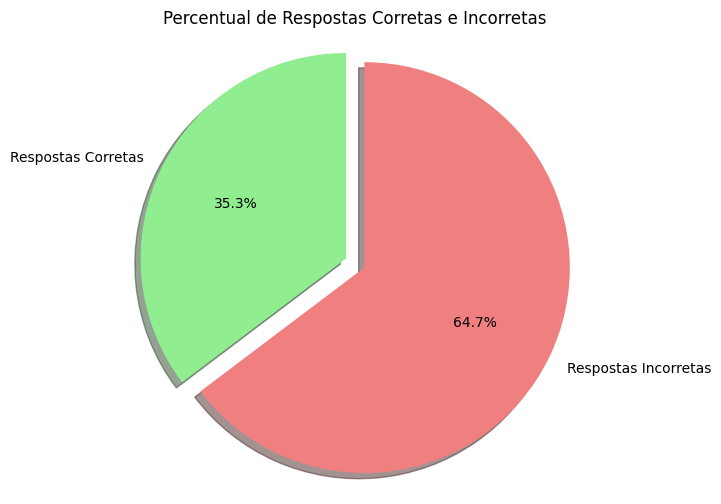

Total de respostas: 3366
Respostas corretas: 1188 (35.3%)
Respostas incorretas: 2178 (64.7%)


In [ ]:
# prompt: Agora de acordo com o melhor gráfico/representação informe o percentual total de respostas certas x erradas: somando tudo, quantas foram as respostas (n ) e quanto dá em percentual. Além disso produza um gráfico que torne estás informações claras

import matplotlib.pyplot as plt

# Assuming true_binary and pred_binary are defined from the previous code

# Calculate total correct and incorrect answers
total_answers = len(true_binary)
amount_correct_answers = sum(1 for true, pred in zip(true_binary, pred_binary) if true == pred)
amount_incorrect_answers = total_answers - amount_correct_answers

# Calculate percentages
correct_percentage = (amount_correct_answers / total_answers) * 100
incorrect_percentage = (amount_incorrect_answers / total_answers) * 100

# Create a pie chart
labels = ['Respostas Corretas', 'Respostas Incorretas']
sizes = [correct_percentage, incorrect_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the correct answers slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentual de Respostas Corretas e Incorretas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print(f"Total de respostas: {total_answers}")
print(f"Respostas corretas: {amount_correct_answers} ({correct_percentage:.1f}%)")
print(f"Respostas incorretas: {amount_incorrect_answers} ({incorrect_percentage:.1f}%)")

### Total de Repostas por Pergunta Individualmente - 36 (corretas e erradas e em %)

In [ ]:
from collections import defaultdict

def calculate_per_question_accuracy(df, correct_answers):
    question_results = defaultdict(lambda: {"correct": 0, "incorrect": 0})

    for _, row in df.iterrows():
        color = row["imagem"]
        correct = correct_answers.get(color, {})

        for question, correct_answer in correct.items():
            if question in row:
                if row[question] == correct_answer:
                    question_results[question]["correct"] += 1
                else:
                    question_results[question]["incorrect"] += 1

    question_summary = []
    for question, results in question_results.items():
        total = results["correct"] + results["incorrect"]
        correct_percent = (results["correct"] / total) * 100 if total > 0 else 0
        incorrect_percent = (results["incorrect"] / total) * 100 if total > 0 else 0
        question_summary.append({
            "Pergunta": question,
            "Corretas": results["correct"],
            "% Corretas": correct_percent,
            "Incorretas": results["incorrect"],
            "% Incorretas": incorrect_percent
        })

    return pd.DataFrame(question_summary)

# Calculate per-question accuracy
question_accuracy_df = calculate_per_question_accuracy(df, correct_answers)

# Display the per-question accuracy table
print("\nPrecisão por Pergunta:")
question_accuracy_df


Precisão por Pergunta:


,Pergunta,Corretas,% Corretas,Incorretas,% Incorretas
0,café_IA_2,56,62.222222,34,37.777778
1,comodo_IA_2,26,28.888889,64,71.111111
2,loja_IA_2,53,58.888889,37,41.111111
3,internet_humano_2,36,40.000000,54,60.000000
4,futuro_IA_2,24,26.666667,66,73.333333
5,pais_humano_2,14,15.555556,76,84.444444
6,brasil_humano_2,30,33.333333,60,66.666667
7,imagem_IA_2,36,40.000000,54,60.000000
8,grafico_humano_2,28,31.111111,62,68.888889
9,café_IA_1,49,44.144144,62,55.855856


### Total de Repostas por Grupo de Pergunta (corretas e erradas e em %)

In [ ]:
def calculate_per_question_accuracy(df, correct_answers):
    # Grouped questions
    grouped_questions = {
        "cafe": ["cafe_humano_1", "cafe_humano_2", "café_IA_1", "café_IA_2"],
        "comodo": ["comodo_humano_1", "comodo_humano_2", "comodo_IA_1", "comodo_IA_2"],
        "loja": ["loja_IA_1", "loja_IA_2", "loja_humano_1", "loja_humano_2"],
        "internet": ["internet_humano_1", "internet_humano_2", "internet_IA_1", "internet_IA_2"],
        "futuro": ["futuro_IA_1", "futuro_IA_2", "futuro_humano_1", "futuro_humano_2"],
        "pais": ["pais_humano_1", "pais_humano_2", "pais_IA_1", "pais_IA_2"],
        "brasil": ["brasil_humano_1", "brasil_humano_2", "brasil_IA_1", "brasil_IA_2"],
        "imagem": ["imagem_IA_1", "imagem_IA_2", "imagem_humano_1", "imagem_humano_2"],
        "grafico": ["grafico_IA_1", "grafico_IA_2", "grafico_humano_1", "grafico_humano_2"]
    }

    question_results = defaultdict(lambda: {"correct": 0, "incorrect": 0, "ia_correct": 0, "ia_incorrect":0, "human_correct": 0, "human_incorrect": 0})

    for _, row in df.iterrows():
        color = row["imagem"]
        correct = correct_answers.get(color, {})

        for group_name, questions in grouped_questions.items():
            for question in questions:
                if question in row and question in correct:
                    if row[question] == correct[question]:
                        question_results[group_name]["correct"] += 1
                        if "Inteligência Artificial" in correct[question]:
                            question_results[group_name]["ia_correct"] += 1
                        else:
                            question_results[group_name]["human_correct"] += 1
                    else:
                        question_results[group_name]["incorrect"] +=1
                        if "Inteligência Artificial" in correct[question]:
                            question_results[group_name]["ia_incorrect"] += 1
                        else:
                            question_results[group_name]["human_incorrect"] += 1


    question_summary = []
    for question, results in question_results.items():
        total = results["correct"] + results["incorrect"]
        correct_percent = (results["correct"] / total) * 100 if total > 0 else 0
        incorrect_percent = (results["incorrect"] / total) * 100 if total > 0 else 0
        ia_correct_percent = (results["ia_correct"] / (results["ia_correct"] + results["ia_incorrect"])) * 100 if (results["ia_correct"] + results["ia_incorrect"]) > 0 else 0
        ia_incorrect_percent = (results["ia_incorrect"] / (results["ia_correct"] + results["ia_incorrect"])) * 100 if (results["ia_correct"] + results["ia_incorrect"]) > 0 else 0
        human_correct_percent = (results["human_correct"] / (results["human_correct"] + results["human_incorrect"])) * 100 if (results["human_correct"] + results["human_incorrect"])> 0 else 0
        human_incorrect_percent = (results["human_incorrect"] / (results["human_correct"] + results["human_incorrect"])) * 100 if (results["human_correct"] + results["human_incorrect"]) > 0 else 0


        question_summary.append({
            "Grupo de Perguntas": question,
            "Total Absoluto de Corretas": results["correct"],
            "% Absoluta Corretas": correct_percent,
            "Total Absoluto de Incorretas": results["incorrect"],
            "% Absoluta Incorretas": incorrect_percent,
            "IA Corretas": results["ia_correct"],
            "% IA Corretas": ia_correct_percent,
            "IA Incorretas": results["ia_incorrect"],
            "% IA Incorretas": ia_incorrect_percent,
            "Humanas Corretas": results["human_correct"],
            "% Humanas Corretas": human_correct_percent,
            "Humanas Incorretas": results["human_incorrect"],
            "% Humanas Incorretas": human_incorrect_percent
        })

    return pd.DataFrame(question_summary)
# Calculate per-question accuracy
question_accuracy_df = calculate_per_question_accuracy(df, correct_answers)

# Display the per-question accuracy table
print("\nPrecisão por Grupo de Perguntas:")
question_accuracy_df


Precisão por Grupo de Perguntas:


,Grupo de Perguntas,Total Absoluto de Corretas,% Absoluta Corretas,Total Absoluto de Incorretas,% Absoluta Incorretas,IA Corretas,% IA Corretas,IA Incorretas,% IA Incorretas,Humanas Corretas,% Humanas Corretas,Humanas Incorretas,% Humanas Incorretas
0,cafe,177,47.326203,197,52.673797,105,52.238806,96,47.761194,72,41.618497,101,58.381503
1,comodo,139,37.165775,235,62.834225,56,32.369942,117,67.630058,83,41.293532,118,58.706468
2,loja,140,37.433155,234,62.566845,68,37.777778,112,62.222222,72,37.113402,122,62.886598
3,internet,129,34.491979,245,65.508021,62,31.958763,132,68.041237,67,37.222222,113,62.777778
4,futuro,113,30.213904,261,69.786096,39,21.666667,141,78.333333,74,38.144330,120,61.855670
5,pais,101,27.005348,273,72.994652,60,30.927835,134,69.072165,41,22.777778,139,77.222222
6,brasil,117,31.283422,257,68.716578,63,32.474227,131,67.525773,54,30.000000,126,70.000000
7,imagem,116,31.016043,258,68.983957,74,41.111111,106,58.888889,42,21.649485,152,78.350515
8,grafico,156,41.711230,218,58.288770,91,45.273632,110,54.726368,65,37.572254,108,62.427746


### Gráfico de dispersão e correlação de Pearson entre Fluência Tecnológica e o Número de Acertos

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Calcula o número total de acertos
results['Acertos'] = results['Acertos_Humano'] + results['Acertos_IA']

# Cria o gráfico de dispersão, definindo os rótulos dos eixos diretamente
fig = px.scatter(results, x='fluencia_tecnologica', y='Acertos', trendline="ols",
                 title='Número de Acertos vs. Fluência Tecnológica',
                 labels={'fluencia_tecnologica': 'Fluência Tecnológica',  # Rótulo do eixo X
                         'Acertos': 'Número de Acertos'})            # Rótulo do eixo Y


# Centraliza o título
fig.update_layout(
    title={
        'text': 'Número de Acertos vs. Fluência Tecnológica - 2024',
        'x': 0.5,  # Centraliza o título no eixo x
        'xanchor': 'center',
    }
)

# Mostra o gráfico
fig.show()

# Calcula a correlação de Pearson
correlation = np.corrcoef(results['fluencia_tecnologica'], results['Acertos'])[0, 1]
print(f"\nCorrelação de Pearson entre Fluência Tecnológica e Número de Acertos: {correlation:.2f}")


Correlação de Pearson entre Fluência Tecnológica e Número de Acertos: -0.04


## QUARTA ETAPA
- Nesta etapa, apenas foram tratados e organizados os dados da última seção do formulário, ou seja, as notas que os indivíduos atribuiram a cada resposta dada pelo ChatGPT, as questões de diferentes áreas e graus de dificuldade, previamente selecionadas.

#### Média das cinco notas de cada participante

In [ ]:
# prompt: Quero uma tabela que apresente a média por pessoa dos valores das colunas: nota_chuva, nota_roupas, nota_equacao/n, nota_arte, nota_geopolitica

# Calculate the average for each person across specified columns
average_scores = df[['nota_chuva', 'nota_roupas', 'nota_equacao', 'nota_arte', 'nota_geopolitica']].mean(axis=1)

# Create a DataFrame to display the results
average_scores_df = pd.DataFrame({'Pessoa': df.index, 'Média das Notas': average_scores})

# Display the DataFrame
average_scores_df

,Pessoa,Média das Notas
0,0,5.0
1,1,4.0
2,2,3.4
3,3,4.2
4,4,4.2
...,...,...
369,369,4.2
370,370,4.0
371,371,4.0
372,372,3.6


#### Número de participantes por média

In [ ]:
# prompt: A partir dos dados da tabela com a Média das Notas, produza uma tabela com o número de pessoas por média

# Group the DataFrame by 'Média das Notas' and count the occurrences
people_per_average = average_scores_df.groupby('Média das Notas')['Pessoa'].count().reset_index()

# Rename the columns for clarity
people_per_average.columns = ['Média das Notas', 'Número de Pessoas']

# Display the resulting DataFrame
people_per_average

,Média das Notas,Número de Pessoas
0,1.8,1
1,2.0,2
2,2.2,2
3,2.4,2
4,2.6,3
5,2.8,4
6,3.0,13
7,3.2,19
8,3.4,22
9,3.6,33


#### Gráfico do número de pessoas por média

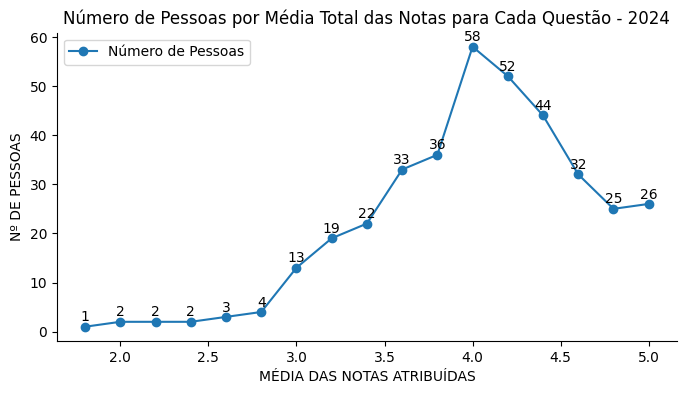

In [ ]:
from matplotlib import pyplot as plt

# Criar o gráfico de linha com 'Média das Notas' no eixo X e 'Número de Pessoas' no eixo Y
ax = people_per_average.plot(
    x='Média das Notas',
    y='Número de Pessoas',
    kind='line',
    figsize=(8, 4),
    title='Número de Pessoas por Média Total das Notas para Cada Questão - 2024', # Título mais descritivo
    marker='o'  # Adiciona marcadores para facilitar a visualização dos pontos
)

# Remover os spines superior e direito
ax.spines[['top', 'right']].set_visible(False)

# Adicionar os valores no gráfico
for x, y in zip(people_per_average['Média das Notas'], people_per_average['Número de Pessoas']):
    ax.text(x, y + 0.5, str(y), ha='center', va='bottom')  # Ajustar o deslocamento conforme necessário

# Adicionar rótulos aos eixos
plt.xlabel('MÉDIA DAS NOTAS ATRIBUÍDAS')
plt.ylabel('Nº DE PESSOAS')

# Exibir o gráfico
plt.show()


#### Gráfico da média obtida por cada questão

<Figure size 1000x600 with 0 Axes>

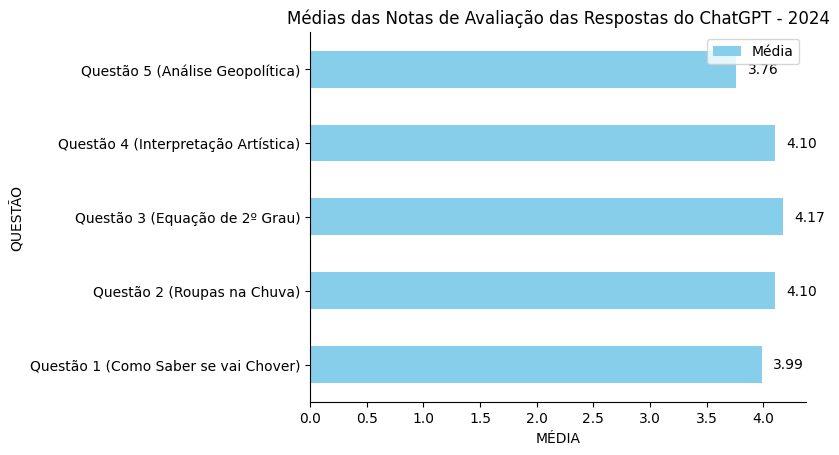

,Métrica,Média
0,Questão 1 (Como Saber se vai Chover),3.989305
1,Questão 2 (Roupas na Chuva),4.101604
2,Questão 3 (Equação de 2º Grau),4.171123
3,Questão 4 (Interpretação Artística),4.101604
4,Questão 5 (Análise Geopolítica),3.762032


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt

# Calculate the average for each metric
metric_averages = df[['nota_chuva', 'nota_roupas', 'nota_equacao', 'nota_arte', 'nota_geopolitica']].mean()

# Create a DataFrame for the averages
metric_averages_df = pd.DataFrame({'Métrica': metric_averages.index, 'Média': metric_averages.values})

# Rename the metrics
metric_averages_df['Métrica'] = metric_averages_df['Métrica'].replace({
    'nota_chuva': 'Questão 1 (Como Saber se vai Chover)',
    'nota_roupas': 'Questão 2 (Roupas na Chuva)',
    'nota_equacao': 'Questão 3 (Equação de 2º Grau)',
    'nota_arte': 'Questão 4 (Interpretação Artística)',
    'nota_geopolitica': 'Questão 5 (Análise Geopolítica)'
})

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
ax = metric_averages_df.plot(kind='barh', x='Métrica', y='Média', color='skyblue')
plt.title('Médias das Notas de Avaliação das Respostas do ChatGPT - 2024')
plt.xlabel('MÉDIA')
plt.ylabel('QUESTÃO')

# Add values to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='left', va='center')


plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Display the table of averages
metric_averages_df

#### Gráfico de correlação entre a média das notas atribuidas a qualidade das produções do ChatGPT, e a opinião incial que os respondentes afirmaram ter a respeito da ferramenta

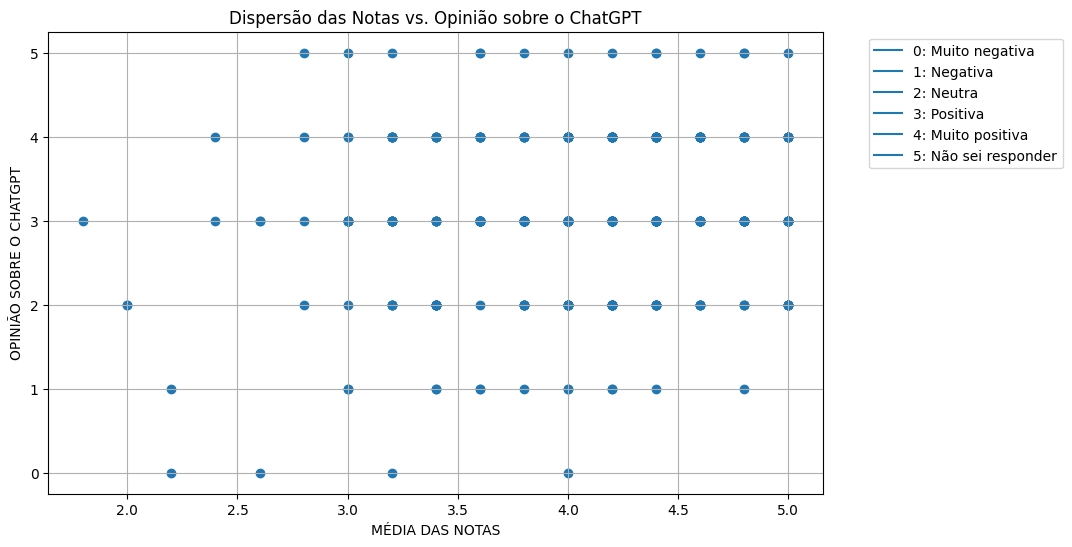

In [ ]:
# Calculate the average score for each participant across all questions
df['Média das Notas'] = df[['nota_chuva', 'nota_roupas', 'nota_equacao', 'nota_arte', 'nota_geopolitica']].mean(axis=1)

# Now you can use the 'Média das Notas' column for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Média das Notas'], df['opiniao_ChatGPT'])
plt.title('Dispersão das Notas vs. Opinião sobre o ChatGPT')
plt.xlabel('MÉDIA DAS NOTAS')
plt.ylabel('OPINIÃO SOBRE O CHATGPT')

# Criar a legenda
legend_labels = {
    0: 'Muito negativa',
    1: 'Negativa',
    2: 'Neutra',
    3: 'Positiva',
    4: 'Muito positiva',
    5: 'Não sei responder'
}

# Adicionar a legenda ao lado do gráfico
plt.legend(handles=[plt.Line2D([0], [0], label=f'{key}: {value}', markerfacecolor='C0', markersize=8) for key, value in legend_labels.items()],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

## COLOCANDO NA PLANILHA GERAL OS DADOS DE ACERTOS

In [ ]:
# Merge the 'Pontuação' column from individual_scores_IA with the DataFrame df
df = pd.merge(df, individual_scores_IA, left_on='id', right_on='Participante', how='left')
df.drop(columns=['Participante'], inplace=True)
df.rename(columns={'Pontuação': 'pontuacao_IA'}, inplace=True)
df

,id,hora_inicio,genero,faixa_etaria,faixa_salarial,nivel_formacao,area_formacao,afinidade_tecnologia,opiniao_ChatGPT,ferramentas,...,grafico_humano_2,nota_chuva,nota_roupas,nota_equacao,nota_arte,nota_geopolitica,conhecimento_tecnologico,fluencia_tecnologica,Média das Notas,pontuacao_IA
0,1,2024-10-20 19:21:20,3.0,1,3,7,3,3,4,"Redes sociais (e.g., Facebook, Instagram) ;Fer...",...,Respondido por Inteligência Artificial,5,5,5,5,5,10,21,5.0,2
1,2,2024-10-20 19:23:57,3.0,1,4,11,6,2,3,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,4,5,4,4,3,9,21,4.0,2
2,3,2024-10-20 19:25:17,2.0,5,4,9,4,3,4,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,1,3,5,5,3,9,26,3.4,5
3,4,2024-10-20 19:26:24,3.0,1,4,6,5,3,2,"Redes sociais (e.g., Facebook, Instagram) ;Pla...",...,NaN,4,4,5,4,4,1,16,4.2,5
4,5,2024-10-20 19:29:59,3.0,1,2,6,5,2,3,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,5,4,5,4,3,12,21,4.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,2024-11-20 10:39:07,3.0,3,3,9,1,2,2,"Processadores de texto (e.g., Microsoft Word, ...",...,NaN,5,5,3,5,3,4,7,4.2,4
370,371,2024-11-20 11:01:58,2.0,4,4,3,0,1,2,"Redes sociais (e.g., Facebook, Instagram)",...,NaN,3,5,4,4,4,4,7,4.0,4
371,372,2024-11-20 12:15:55,3.0,1,6,9,1,2,3,"Redes sociais (e.g., Facebook, Instagram) ;Pla...",...,NaN,3,4,4,5,4,7,20,4.0,5
372,373,2024-11-20 12:25:09,2.0,2,4,6,1,2,4,"Redes sociais (e.g., Facebook, Instagram) ;Pro...",...,NaN,5,2,4,3,4,8,21,3.6,3
